### Import libraries

In [25]:
## import libraries
import pandas as pd
import time
import os

## import code files
import knuth_morris_pratt as kmp
import rabin_karp as rk
import boyer_moore
import naive

In [26]:
## locate the data files
files = [i for i in os.listdir('.') if (i[-4:]=='.csv') and ('res' not in i) and ('perf' not in i)]

# files = [i for i in files if 'worst' in i]
print("data files are:\n",files)

data files are:
 ['data_worst_case15000.csv', 'data500.csv', 'data_worst_case25000.csv', 'data_worst_case1000000.csv', 'data_worst_case100000.csv', 'data25000.csv', 'data15000.csv', 'data_worst_case500.csv']


In [27]:
## define a dictionary to store the comparison of performance
perf_comp = {'data': [],'rabin_karp': [],'knuth_morris_pratt': [],'boyer_moore': [],'naive': []}

## loop over each data file
for file in files:
    ## define the result filename
    file_result = file[:-4]+'res.csv'
    ## read the file
    print('Currently working on ',file)
    df = pd.read_csv(file)
    ## load main string and sub string inputs for testing the algorithms
    main_str_data, sub_str_data = df['main_str_data'].values,df['sub_str_data'].values

    ## run algorithms on each dataset 10 times, to calculate an aggregate computation time later
    for i in range(10):
        ## define a dictionary to store the sub string location by each algorithm
        result = {'main_str_data': [],'sub_str_data': [],'index_kmp': [],'index_rk': [],'index_bm': [],'index_naive': []}
        ## enter the filename into comparison dictionary
        perf_comp['data'].append(file)

        ## USING KNUTH-MORIS-PRATT SEARCH ALGORITHM
        ## start the timer
        start_time = time.monotonic()
        ## loop over each main string and sub string data point
        for main_str,sub_str in zip(main_str_data, sub_str_data):
            ## locate the substring
            result['index_kmp'].append(kmp.search(sub_str, main_str))
        ## calculate the time taken
        perf_comp['knuth_morris_pratt'].append(time.monotonic() - start_time)
#         print('Knuth-Moris-Pratt Completion time ',perf_comp['knuth_morris_pratt'][-1],' seconds')

        ## USING RABIN-KARP SEARCH ALGORITHM
        ## start the timer
        start_time = time.monotonic()
        ## loop over each main string and sub string data point
        for main_str,sub_str in zip(main_str_data, sub_str_data):
            ## locate the substring
            result['index_rk'].append(rk.search(sub_str, main_str, 101))
        ## calculate the substring
        perf_comp['rabin_karp'].append(time.monotonic() - start_time)
#         print('Rabin-Karp Completion time ',perf_comp['rabin_karp'][-1],' seconds')

        ## USING BOYER MOORE SEARCH ALGORITHM
        ## start the timer
        start_time = time.monotonic()
        ## loop over each main string and sub string data point
        for main_str,sub_str in zip(main_str_data, sub_str_data):
            ## locate the substring
            result['index_bm'].append(boyer_moore.search(main_str, sub_str))
        ## calculate the substring
        perf_comp['boyer_moore'].append(time.monotonic() - start_time)
#         print('Naive Completion time ',perf_comp['naive'][-1],' seconds')

        ## USING NAIVE SEARCH ALGORITHM
        ## start the timer
        start_time = time.monotonic()
        ## loop over each main string and sub string data point
        for main_str,sub_str in zip(main_str_data, sub_str_data):
            ## locate the substring
            result['index_naive'].append(naive.search(sub_str, main_str))
        ## calculate the substring
        perf_comp['naive'].append(time.monotonic() - start_time)
#         print('Naive Completion time ',perf_comp['naive'][-1],' seconds')
        
        ## save main string and sub string information to store with location of substring
        result['main_str_data'] = main_str_data
        result['sub_str_data'] = sub_str_data
        ## save result file
        pd.DataFrame(result).to_csv(file_result, index=False)
    # break

## save the comparison of performance
print('Saving the performance records...')
pd.DataFrame(perf_comp).to_csv('perf_comp.csv', index=False)
print('Program completed')

Currently working on  data_worst_case15000.csv
Currently working on  data500.csv
Currently working on  data_worst_case25000.csv
Currently working on  data_worst_case1000000.csv
Currently working on  data_worst_case100000.csv
Currently working on  data25000.csv
Currently working on  data15000.csv
Currently working on  data_worst_case500.csv
Saving the performance records...
Program completed


### Comparison of Performance

In [28]:
import matplotlib.pyplot as plt

In [29]:
df_comp = pd.read_csv('./perf_comp.csv')

In [30]:
df_comp.head()

,data,rabin_karp,knuth_morris_pratt,boyer_moore,naive
0,data_worst_case15000.csv,0.283140,0.249475,0.263373,0.316896
1,data_worst_case15000.csv,0.277787,0.246258,0.263644,0.315752
2,data_worst_case15000.csv,0.277408,0.246582,0.264334,0.316448
3,data_worst_case15000.csv,0.279751,0.247312,0.264412,0.318553
4,data_worst_case15000.csv,0.285143,0.248610,0.265098,0.314503


In [31]:
## group the result by dataset type and find average time of computation
df_comp.groupby(by='data').mean()

,rabin_karp,knuth_morris_pratt,boyer_moore,naive
data,,,,
data15000.csv,0.268608,0.212247,0.116159,0.120832
data25000.csv,0.451531,0.356303,0.194379,0.203153
data500.csv,0.009007,0.007076,0.003840,0.004020
data_worst_case100000.csv,1.900252,1.676630,1.794362,2.145054
data_worst_case1000000.csv,18.961741,16.770006,18.006947,21.443396
data_worst_case15000.csv,0.281447,0.246917,0.264008,0.316128
data_worst_case25000.csv,0.471061,0.411532,0.441337,0.527745
data_worst_case500.csv,0.009496,0.008399,0.008917,0.010767


In [32]:
## seperate the performance of normal datasets and worst case datasets for analysis
df_comp_normal_case = df_comp[~df_comp.data.str.contains('worst')].reset_index(drop=True)
df_comp_worst_case = df_comp[df_comp.data.str.contains('worst')].reset_index(drop=True)

# Experiment 1 - Normal Case Data

Almost all characters are random, there is no repitition

For example -<br>
Main string = <br>
FOKPBNCPSNYUPIBNZXSSNQURASRUUYKTBVVYXFPPFLSTAAKAZZMOYETRVOZFXYHCKOFWXKKQHRODWQHY<u><b>POMW</b></u>ZLQKHQXCQTZXQUGOWNIYSBHJIKPU
Sub string = <br>
POMW

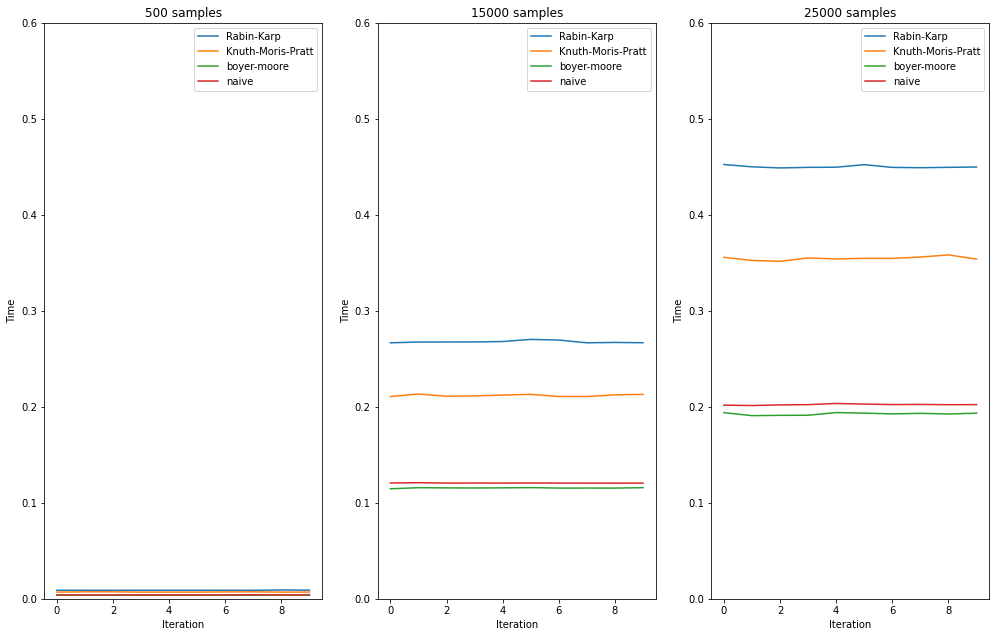

In [19]:
legends = ['Rabin-Karp','Knuth-Moris-Pratt','boyer-moore','naive']

plt.figure(figsize=(15,8))

plt.subplot(131)
plt.ylabel('Time')
plt.xlabel('Iteration')
plt.ylim(0,0.6)
plt.title('500 samples')
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('500.csv')].reset_index()['rabin_karp'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('500.csv')].reset_index()['knuth_morris_pratt'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('500.csv')].reset_index()['boyer_moore'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('500.csv')].reset_index()['naive'])
plt.legend(legends)

plt.subplot(132)
plt.ylabel('Time')
plt.xlabel('Iteration')
plt.ylim(0,0.6)
plt.title('15000 samples')
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('15000.csv')].reset_index()['rabin_karp'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('15000.csv')].reset_index()['knuth_morris_pratt'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('15000.csv')].reset_index()['boyer_moore'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('15000.csv')].reset_index()['naive'])
plt.legend(legends)

plt.subplot(133)
plt.ylabel('Time')
plt.xlabel('Iteration')
plt.ylim(0,0.6)
plt.title('25000 samples')
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('25000.csv')].reset_index()['rabin_karp'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('25000.csv')].reset_index()['knuth_morris_pratt'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('25000.csv')].reset_index()['boyer_moore'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('25000.csv')].reset_index()['naive'])
plt.legend(legends)

plt.subplots_adjust(bottom=0, right=1, top=1)

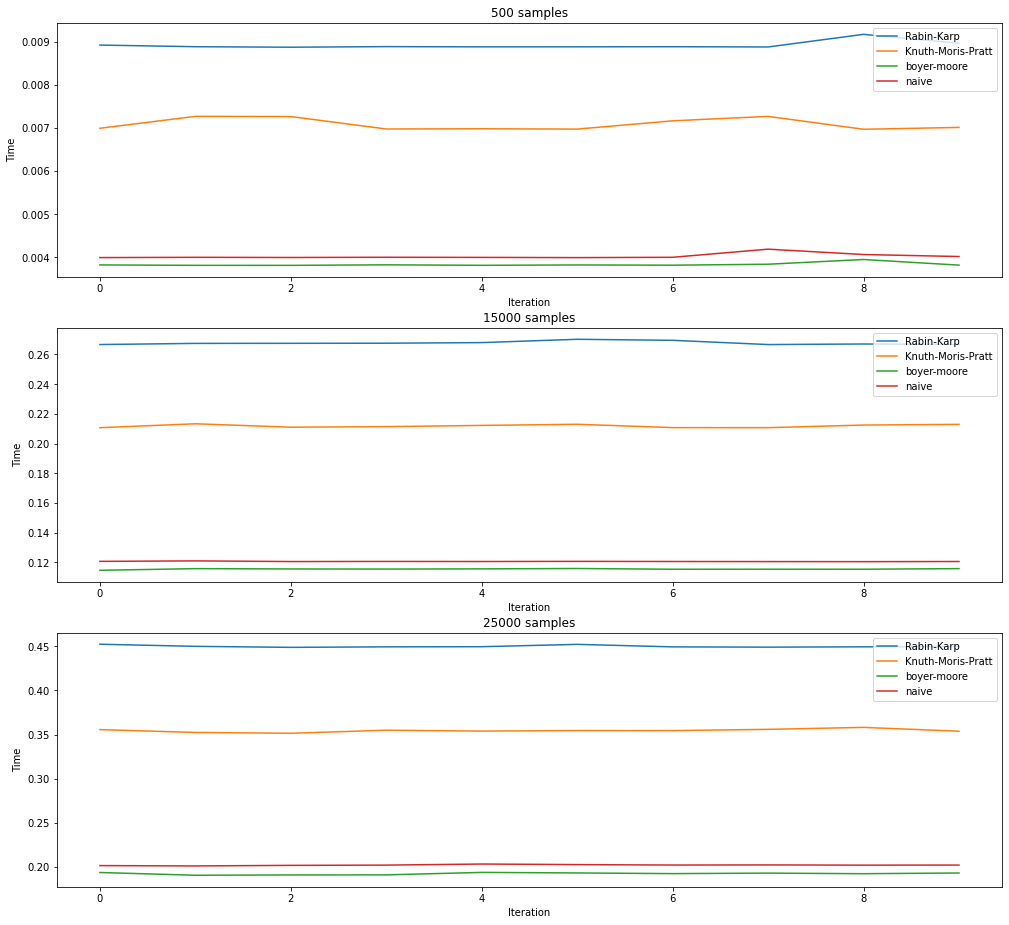

In [11]:
legends = ['Rabin-Karp','Knuth-Moris-Pratt','boyer-moore','naive']

plt.figure(figsize=(15,12))

plt.subplot(311)
plt.ylabel('Time')
plt.xlabel('Iteration')
plt.title('500 samples')
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('500.csv')].reset_index()['rabin_karp'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('500.csv')].reset_index()['knuth_morris_pratt'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('500.csv')].reset_index()['boyer_moore'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('500.csv')].reset_index()['naive'])
plt.legend(legends)

plt.subplot(312)
plt.ylabel('Time')
plt.xlabel('Iteration')
plt.title('15000 samples')
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('15000.csv')].reset_index()['rabin_karp'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('15000.csv')].reset_index()['knuth_morris_pratt'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('15000.csv')].reset_index()['boyer_moore'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('15000.csv')].reset_index()['naive'])
plt.legend(legends)

plt.subplot(313)
plt.ylabel('Time')
plt.xlabel('Iteration')
plt.title('25000 samples')
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('25000.csv')].reset_index()['rabin_karp'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('25000.csv')].reset_index()['knuth_morris_pratt'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('25000.csv')].reset_index()['boyer_moore'])
plt.plot(df_comp_normal_case[df_comp_normal_case.data.str.contains('25000.csv')].reset_index()['naive'])
plt.legend(legends)

plt.subplots_adjust(bottom=0, right=1, top=1)

([<matplotlib.axis.XTick at 0x7fb419278100>,
 [Text(1, 0, 'Rabin-Karp'),
  Text(2, 0, 'Knuth-Moris-Pratt'),
  Text(3, 0, 'boyer-moore'),
  Text(4, 0, 'naive')])

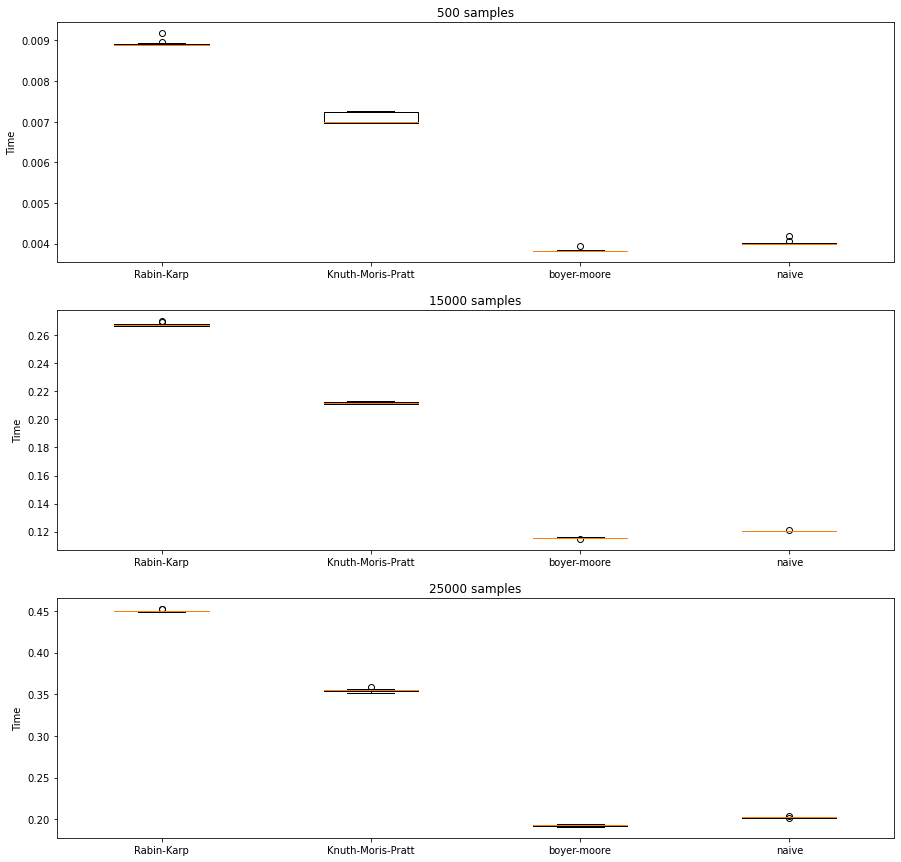

In [12]:
legends = ['Rabin-Karp','Knuth-Moris-Pratt','boyer-moore','naive']

plt.figure(figsize=(15,15))

plt.subplot(311)
plt.ylabel('Time')
plt.title('500 samples')
plt.boxplot([df_comp_normal_case[df_comp_normal_case.data.str.contains('500.csv')].reset_index()['rabin_karp'], 
             df_comp_normal_case[df_comp_normal_case.data.str.contains('500.csv')].reset_index()['knuth_morris_pratt'],
             df_comp_normal_case[df_comp_normal_case.data.str.contains('500.csv')].reset_index()['boyer_moore'],
             df_comp_normal_case[df_comp_normal_case.data.str.contains('500.csv')].reset_index()['naive']])
plt.xticks([1,2,3,4],legends)

plt.subplot(312)
plt.ylabel('Time')
plt.title('15000 samples')
plt.boxplot([df_comp_normal_case[df_comp_normal_case.data.str.contains('15000.csv')].reset_index()['rabin_karp'], 
             df_comp_normal_case[df_comp_normal_case.data.str.contains('15000.csv')].reset_index()['knuth_morris_pratt'],
             df_comp_normal_case[df_comp_normal_case.data.str.contains('15000.csv')].reset_index()['boyer_moore'],
             df_comp_normal_case[df_comp_normal_case.data.str.contains('15000.csv')].reset_index()['naive']])
plt.xticks([1,2,3,4],legends)

plt.subplot(313)
plt.ylabel('Time')
plt.title('25000 samples')
plt.boxplot([df_comp_normal_case[df_comp_normal_case.data.str.contains('25000.csv')].reset_index()['rabin_karp'], 
             df_comp_normal_case[df_comp_normal_case.data.str.contains('25000.csv')].reset_index()['knuth_morris_pratt'],
             df_comp_normal_case[df_comp_normal_case.data.str.contains('25000.csv')].reset_index()['boyer_moore'],
             df_comp_normal_case[df_comp_normal_case.data.str.contains('25000.csv')].reset_index()['naive']])
plt.xticks([1,2,3,4],legends)

### Analysis for Normal Case string matching

- We generated datasets containing 500, 15000 and 25000 samples
- We used Rabin-Karp, Knuth-Moris-Pratt, Boyer-Moore and Naive methods for string matching
- We ran these algorithms 10 times on each dataset to get idea about accurate average execution time

### Conclusion

By looking at the graphs above, we can conclude that the Naive approach and Boyer-Moore methods are the best methods for string matching as they take the least time (~50% less than other two) for execution.<br><br>
The Naive approach itself is very good, hence it is almost pointless to use any other algorithm for string matching in this case.

# Experiment 2 - Worst Case Data

Almost all characters are same, there is repitition

For example -<br>
Main string = <br>
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA<u><b>AAB</b></u>BBBBB<br>
Sub string = <br>
AAB

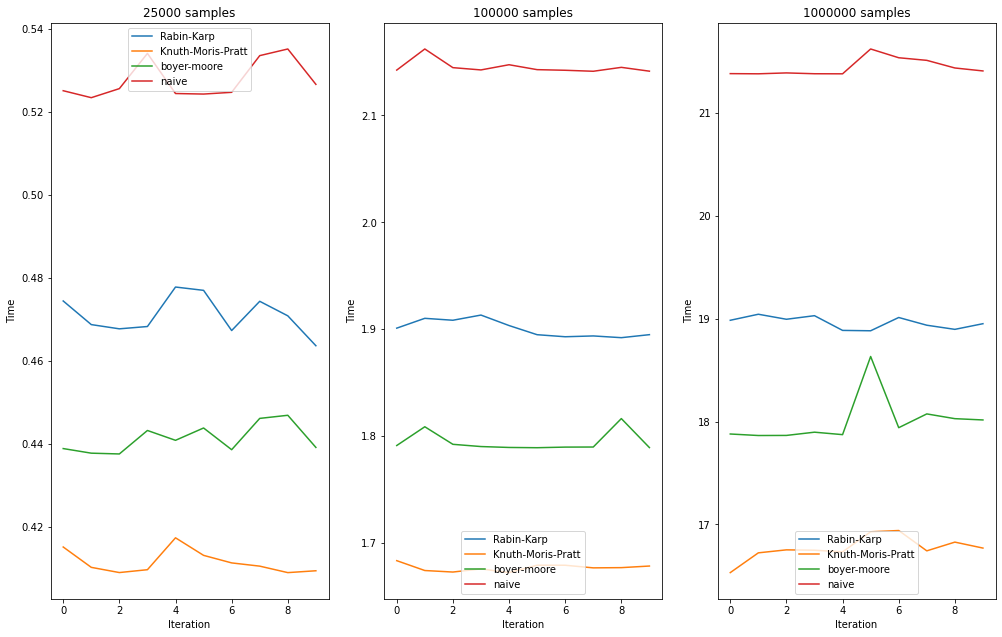

In [35]:
legends = ['Rabin-Karp','Knuth-Moris-Pratt','boyer-moore','naive']

plt.figure(figsize=(15,8))

plt.subplot(131)
plt.ylabel('Time')
plt.xlabel('Iteration')
# plt.ylim(0,0.6)
plt.title('25000 samples')
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('25000.csv')].reset_index()['rabin_karp'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('25000.csv')].reset_index()['knuth_morris_pratt'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('25000.csv')].reset_index()['boyer_moore'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('25000.csv')].reset_index()['naive'])
plt.legend(legends)

plt.subplot(132)
plt.ylabel('Time')
plt.xlabel('Iteration')
# plt.ylim(0,0.6)
plt.title('100000 samples')
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('100000.csv')].reset_index()['rabin_karp'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('100000.csv')].reset_index()['knuth_morris_pratt'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('100000.csv')].reset_index()['boyer_moore'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('100000.csv')].reset_index()['naive'])
plt.legend(legends)

plt.subplot(133)
plt.ylabel('Time')
plt.xlabel('Iteration')
# plt.ylim(0,0.6)
plt.title('1000000 samples')
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('1000000.csv')].reset_index()['rabin_karp'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('1000000.csv')].reset_index()['knuth_morris_pratt'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('1000000.csv')].reset_index()['boyer_moore'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('1000000.csv')].reset_index()['naive'])
plt.legend(legends)

plt.subplots_adjust(bottom=0, right=1, top=1)

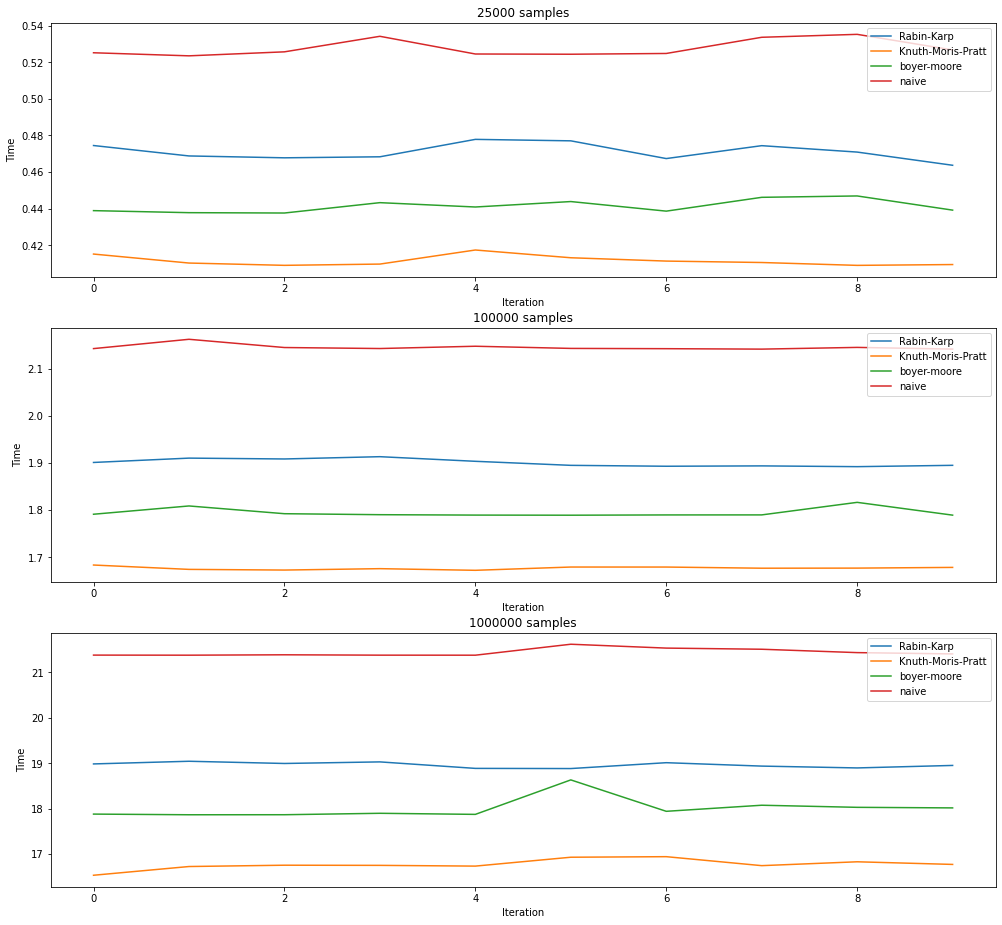

In [37]:
legends = ['Rabin-Karp','Knuth-Moris-Pratt','boyer-moore','naive']

plt.figure(figsize=(15,12))

plt.subplot(311)
plt.ylabel('Time')
plt.xlabel('Iteration')
plt.title('25000 samples')
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('25000.csv')].reset_index()['rabin_karp'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('25000.csv')].reset_index()['knuth_morris_pratt'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('25000.csv')].reset_index()['boyer_moore'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('25000.csv')].reset_index()['naive'])
plt.legend(legends)

plt.subplot(312)
plt.ylabel('Time')
plt.xlabel('Iteration')
plt.title('100000 samples')
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('100000.csv')].reset_index()['rabin_karp'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('100000.csv')].reset_index()['knuth_morris_pratt'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('100000.csv')].reset_index()['boyer_moore'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('100000.csv')].reset_index()['naive'])
plt.legend(legends)

plt.subplot(313)
plt.ylabel('Time')
plt.xlabel('Iteration')
plt.title('1000000 samples')
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('1000000.csv')].reset_index()['rabin_karp'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('1000000.csv')].reset_index()['knuth_morris_pratt'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('1000000.csv')].reset_index()['boyer_moore'])
plt.plot(df_comp_worst_case[df_comp_worst_case.data.str.contains('1000000.csv')].reset_index()['naive'])
plt.legend(legends)

plt.subplots_adjust(bottom=0, right=1, top=1)

([<matplotlib.axis.XTick at 0x7fb41ccb24c0>,
 [Text(1, 0, 'Rabin-Karp'),
  Text(2, 0, 'Knuth-Moris-Pratt'),
  Text(3, 0, 'boyer-moore'),
  Text(4, 0, 'naive')])

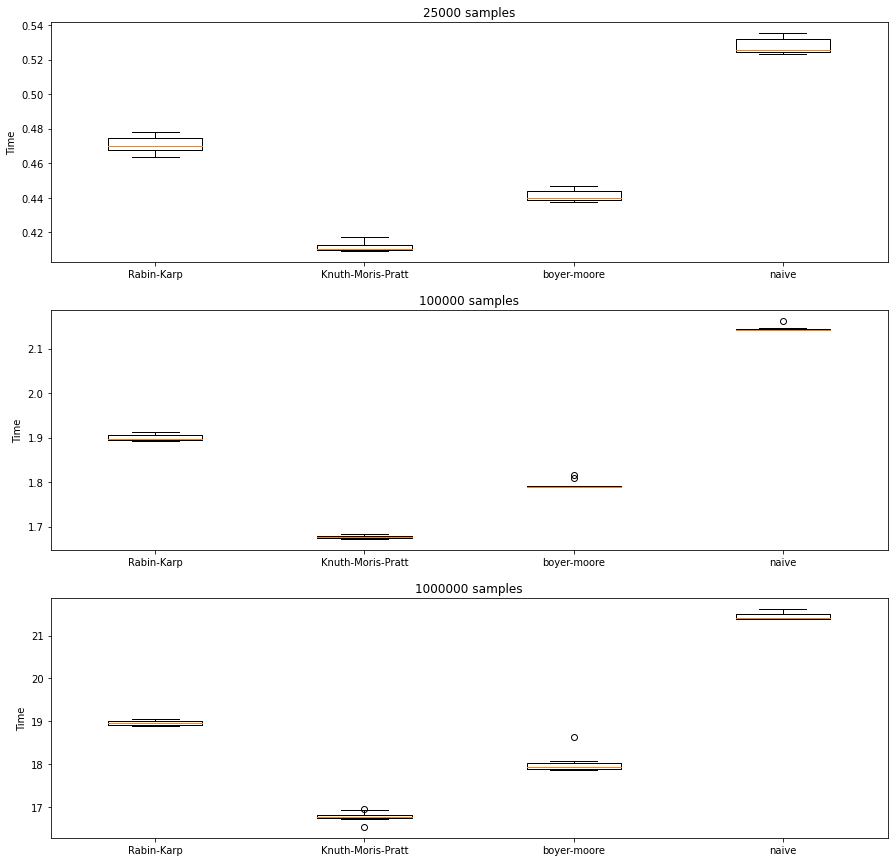

In [38]:
legends = ['Rabin-Karp','Knuth-Moris-Pratt','boyer-moore','naive']

plt.figure(figsize=(15,15))

plt.subplot(311)
plt.ylabel('Time')
plt.title('25000 samples')
plt.boxplot([df_comp_worst_case[df_comp_worst_case.data.str.contains('25000.csv')].reset_index()['rabin_karp'], 
             df_comp_worst_case[df_comp_worst_case.data.str.contains('25000.csv')].reset_index()['knuth_morris_pratt'],
             df_comp_worst_case[df_comp_worst_case.data.str.contains('25000.csv')].reset_index()['boyer_moore'],
             df_comp_worst_case[df_comp_worst_case.data.str.contains('25000.csv')].reset_index()['naive']])
plt.xticks([1,2,3,4],legends)

plt.subplot(312)
plt.ylabel('Time')
plt.title('100000 samples')
plt.boxplot([df_comp_worst_case[df_comp_worst_case.data.str.contains('100000.csv')].reset_index()['rabin_karp'], 
             df_comp_worst_case[df_comp_worst_case.data.str.contains('100000.csv')].reset_index()['knuth_morris_pratt'],
             df_comp_worst_case[df_comp_worst_case.data.str.contains('100000.csv')].reset_index()['boyer_moore'],
             df_comp_worst_case[df_comp_worst_case.data.str.contains('100000.csv')].reset_index()['naive']])
plt.xticks([1,2,3,4],legends)

plt.subplot(313)
plt.ylabel('Time')
plt.title('1000000 samples')
plt.boxplot([df_comp_worst_case[df_comp_worst_case.data.str.contains('1000000.csv')].reset_index()['rabin_karp'], 
             df_comp_worst_case[df_comp_worst_case.data.str.contains('1000000.csv')].reset_index()['knuth_morris_pratt'],
             df_comp_worst_case[df_comp_worst_case.data.str.contains('1000000.csv')].reset_index()['boyer_moore'],
             df_comp_worst_case[df_comp_worst_case.data.str.contains('1000000.csv')].reset_index()['naive']])
plt.xticks([1,2,3,4],legends)

### Analysis for Worst Case string matching

- We generated worst case datasets containing 500, 15000 and 25000 samples
- We used Rabin-Karp, Knuth-Moris-Pratt, Boyer-Moore and Naive methods for string matching
- We ran these algorithms 10 times on each dataset to get idea about accurate average execution time

### Conclusion

By looking at the graphs above, we can conclude that the Knuth-Moris_Pratt method is the best method for string matching in our defined worst case like problems.<br><br> 

It takes the least time 
- Almost 12% better than Rabin-Karp method
- Almost 8% better than Boyer-Moore method
- More than 20% better than the Naive Approach<br><br>

Since, in all the cases Knuth-Morris-Pratt algorithm performs the best, we can conclude that in our defined worst case scenarios, it is the best algorithm to turn to.